In [1]:
import h5py
import matplotlib.pyplot as plt

from pyDFCSR3D_post_processor import *

In [2]:
%matplotlib widget

no_CSR_filepaths = ["/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/0.h5",
                      "/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/9.h5",
                      "/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/16.h5"]

yes_CSR_filepaths = ["/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/dipole-yes-wake-particles-1.h5",
                       "/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/dipole-yes-wake-particles-10.h5",
                       "/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/dipole-yes-wake-particles-end.h5"]

no_CSR_histograms = [file2histograms(200, 150, 5, 5, filepath) for filepath in no_CSR_filepaths]
yes_CSR_histograms = [file2histograms(200, 150, 5, 5, filepath) for filepath in yes_CSR_filepaths]

no_CSR_statistics = load_new_data("/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/new_code_data.h5")
yes_CSR_statistics = load_old_data("/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/dipole-yes-wake-statistics.h5")

step_values = [1, 10, 16]

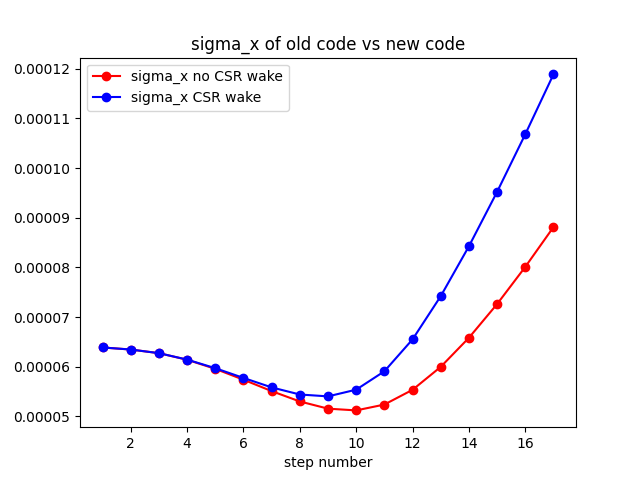

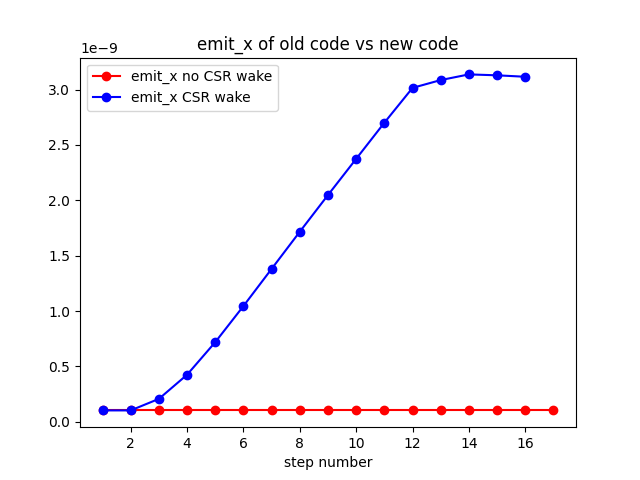

In [3]:
# Plots some statistics
plt.figure()
plot_statistic(no_CSR_statistics["sigma_x"], new_figure=False, label="sigma_x no CSR wake", color="red")
plot_statistic(yes_CSR_statistics["sigma_x"], new_figure=False, label="sigma_x CSR wake", color="blue")
plt.title("sigma_x with and without CSR wake applied")
plt.xlabel("step number")
plt.legend()
plt.show()

plt.figure()
plot_statistic(no_CSR_statistics["twiss"]["emit_x"], new_figure=False, label="emit_x no CSR wake", color="red")
plot_statistic(yes_CSR_statistics["twiss"]["emit_x"], new_figure=False, label="emit_x CSR wake", color="blue")
plt.title("emit_x with and without CSR wake applied")
plt.xlabel("step number")
plt.legend()
plt.show()

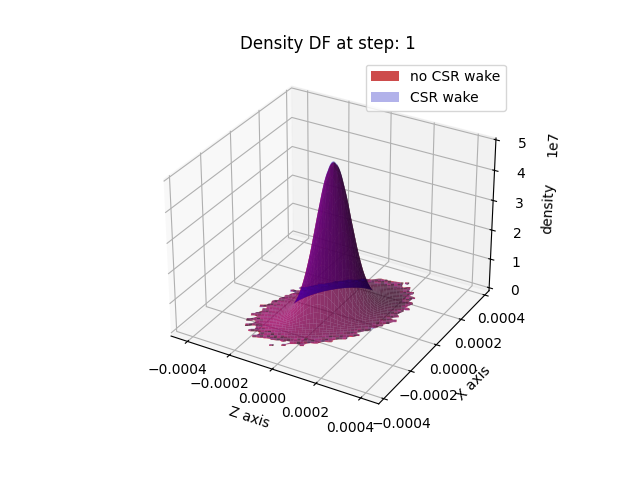

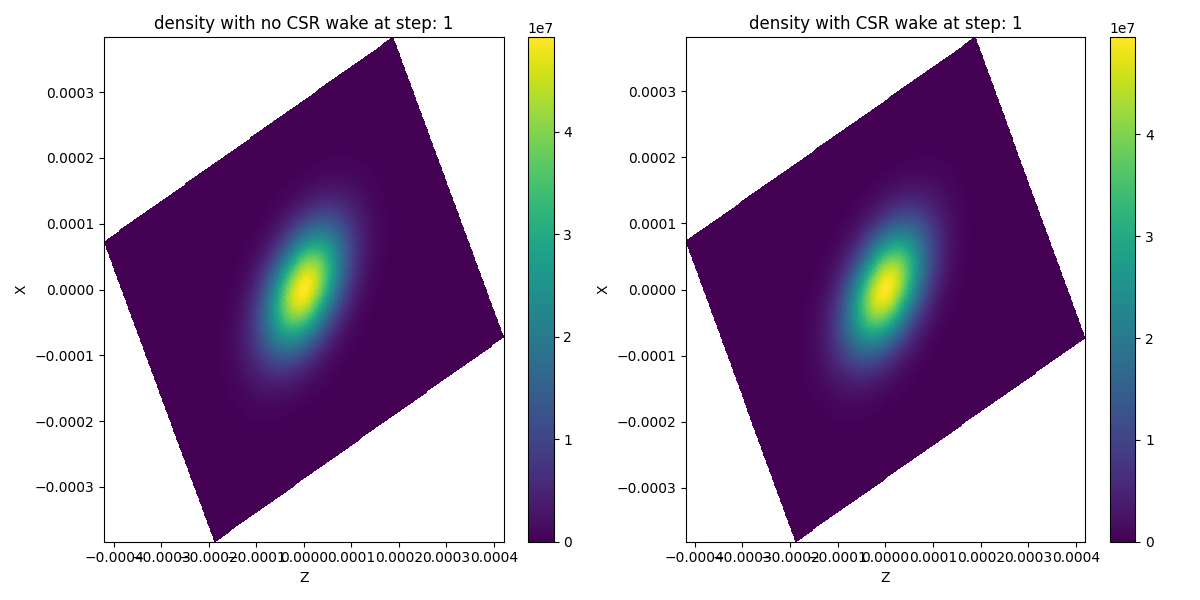

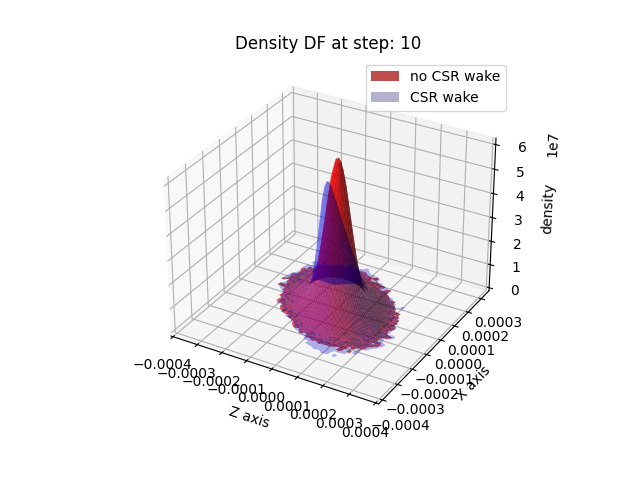

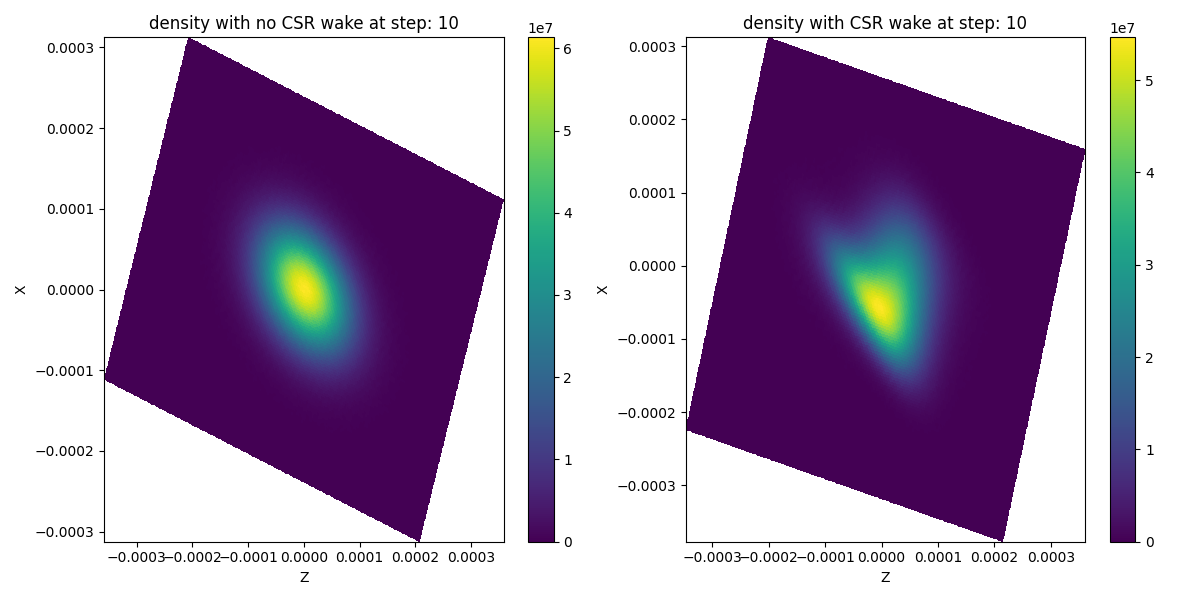

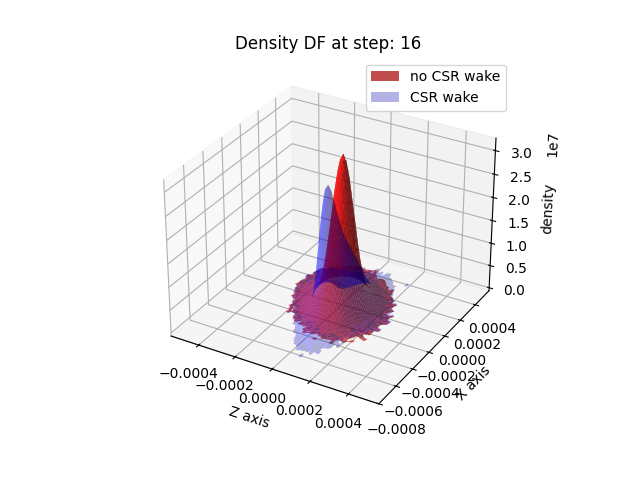

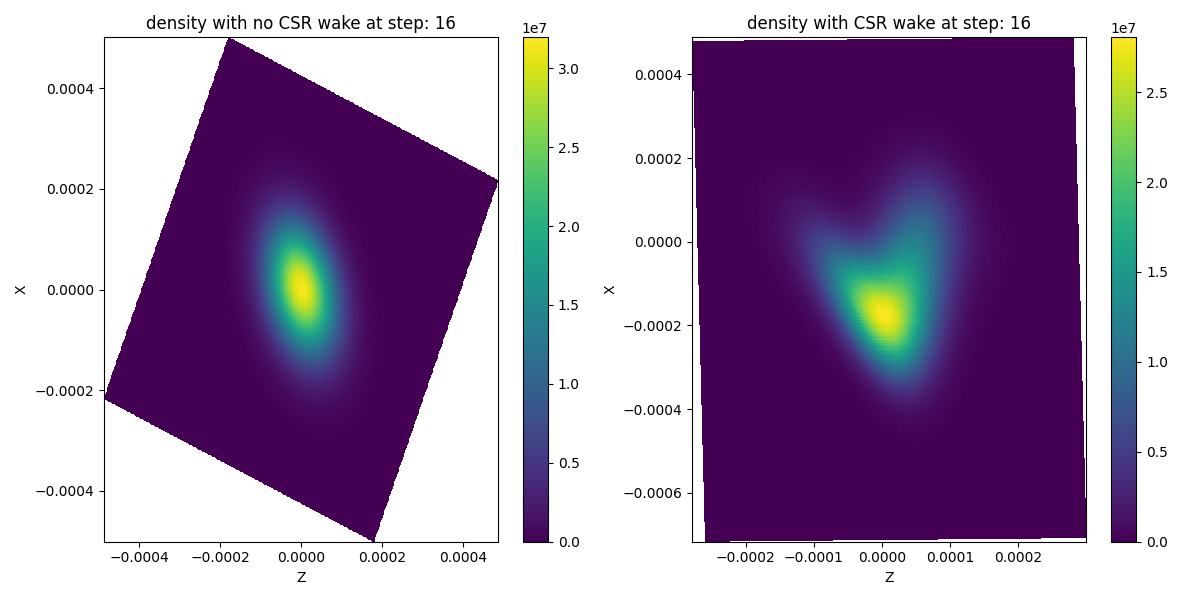

In [4]:
# Compare the density and beta_x distributions functions
for index in range(len(no_CSR_filepaths)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    plot_surface2((no_CSR_histograms[index])["mesh_coords"], (no_CSR_histograms[index])["density"], fig=fig, ax=ax, alpha=0.7, color="red", label="no CSR wake")
    plot_surface2((yes_CSR_histograms[index])["mesh_coords"], (yes_CSR_histograms[index])["density"], fig=fig, ax=ax, alpha=0.3, color="blue", label="CSR wake")

    ax.set_title("Density DF at step: "+ str(step_values[index]))
    ax.set_xlabel('Z axis')
    ax.set_ylabel('X axis')
    ax.set_zlabel('density')
    ax.set_aspect('auto')
    ax.legend()
    plt.show()

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    plot_histogram2((no_CSR_histograms[index])["mesh_coords"], (no_CSR_histograms[index])["density"], title="density with no CSR wake at step: "+ str(step_values[index]), ax=ax[0], fig=fig)
    plot_histogram2((yes_CSR_histograms[index])["mesh_coords"], (yes_CSR_histograms[index])["density"], title="density with CSR wake at step: "+ str(step_values[index]), ax=ax[1], fig=fig)
    plt.tight_layout()
    plt.show()